In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('chatGPT-dataset-martina-inglese.csv')

In [4]:
df.head(3)

,Unnamed: 0,Date Created,Tweet ID,Content,Username,Nr. Likes,Lang,Tweet Source,Replies,Mentions,outlinks
0,0,2023-04-29 23:59:55+00:00,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,NaN,1,"[User(username='OpenAI', id=4398626122, displa...",[]
1,1,2023-04-29 23:59:54+00:00,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,NaN,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB']
2,2,2023-04-29 23:59:48+00:00,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,NaN,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...


In [5]:
df.tail(3)

,Unnamed: 0,Date Created,Tweet ID,Content,Username,Nr. Likes,Lang,Tweet Source,Replies,Mentions,outlinks
19999,19999,2023-05-29 05:08:17+00:00,1663049602851807232,@ivy_wylder @ask_aubry I’ve been looking for s...,dan_dd,6,en,NaN,0,"[User(username='ivy_wylder', id=12147283985404...",[]
20000,20000,2023-05-29 05:07:40+00:00,1663049444613410816,Is someone gonna remake Facade with ChatGPT?,PwnySlaystation,1,en,NaN,0,NaN,[]
20001,20001,2023-05-29 05:07:17+00:00,1663049350560514050,@shotgun2thehead chatgpt is really good people...,teengoatmance,1,en,NaN,1,"[User(username='shotgun2thehead', id=257651288...",[]


In [6]:
df.shape

(20002, 11)

In [7]:
df.columns

Index(['Unnamed: 0', 'Date Created', 'Tweet ID', 'Content', 'Username',
       'Nr. Likes', 'Lang', 'Tweet Source', 'Replies', 'Mentions', 'outlinks'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0          0
Date Created        0
Tweet ID            0
Content             0
Username            0
Nr. Likes           0
Lang                0
Tweet Source    20002
Replies             0
Mentions        11497
outlinks            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20002 non-null  int64  
 1   Date Created  20002 non-null  object 
 2   Tweet ID      20002 non-null  int64  
 3   Content       20002 non-null  object 
 4   Username      20002 non-null  object 
 5   Nr. Likes     20002 non-null  int64  
 6   Lang          20002 non-null  object 
 7   Tweet Source  0 non-null      float64
 8   Replies       20002 non-null  int64  
 9   Mentions      8505 non-null   object 
 10  outlinks      20002 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.7+ MB


In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)
df.head(3)

,Date Created,Tweet ID,Content,Username,Nr. Likes,Lang,Tweet Source,Replies,Mentions,outlinks
0,2023-04-29 23:59:55+00:00,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,NaN,1,"[User(username='OpenAI', id=4398626122, displa...",[]
1,2023-04-29 23:59:54+00:00,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,NaN,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB']
2,2023-04-29 23:59:48+00:00,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,NaN,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...


In [12]:
df.describe() # controllo i valori relativi al numero di Like  --> andamento esponenziale e Replies

,Tweet ID,Nr. Likes,Tweet Source,Replies
count,2.000200e+04,20002.000000,0.0,20002.000000
mean,1.657769e+18,14.508249,NaN,1.747275
std,5.430001e+15,438.253544,NaN,40.415320
min,1.652217e+18,0.000000,NaN,0.000000
25%,1.652341e+18,0.000000,NaN,0.000000
50%,1.657756e+18,1.000000,NaN,0.000000
75%,1.663202e+18,2.000000,NaN,1.000000
max,1.663334e+18,48534.000000,NaN,3712.000000


In [13]:
df.nunique()

Date Created    18121
Tweet ID        20002
Content         19780
Username        15333
Nr. Likes         281
Lang               11
Tweet Source        0
Replies            95
Mentions         5947
outlinks         4965
dtype: int64

In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [15]:
most_frequent_values(df) #cerco numero di like e replies più frequente

index 0 is out of bounds for axis 0 with size 0


,Date Created,Tweet ID,Content,Username,Nr. Likes,Lang,Tweet Source,Replies,Mentions,outlinks
Total,20002,20002,20002,20002,20002,20002,0,20002,8505,20002
Most frequent item,2023-05-29 17:00:00+00:00,1652462748792672257,@hasantoxr 3x Udemy &amp; ChatGPT Courses,serenesells,0,en,0,0,"[User(username='hasantoxr', id=150605500599202...",[]
Frequence,6,1,64,213,9825,19970,0,12976,333,14079
Percent from total,0.03,0.005,0.32,1.065,49.12,99.84,NaN,64.874,3.915,70.388


# Faccio studi su andamento dei valori --> tutti andamento esponenziale

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df['Username'].unique()

array(['farahsays01', 'CravenTravels', 'ViewsParallax', ..., 'dan_dd',
       'PwnySlaystation', 'teengoatmance'], dtype=object)

In [18]:
# Calcolo il numero di post per username
df['Username'].value_counts()

serenesells        213
paramendra          92
ChatGPT_yearn       86
nftsalesbot         69
memdotai            58
                  ... 
j_g_allen            1
medullaoblon         1
DraganS95783681      1
A4Andrezao           1
teengoatmance        1
Name: Username, Length: 15333, dtype: int64

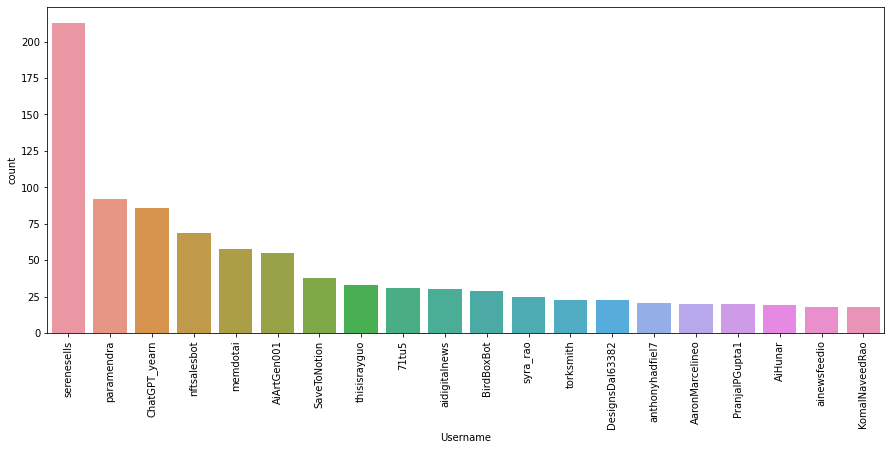

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [20]:
df['Tweet ID'].unique()

array([1652462748792672257, 1652462745772597249, 1652462718920654883, ...,
       1663049602851807232, 1663049444613410816, 1663049350560514050])

In [21]:
df['Tweet ID'].value_counts()

1652462748792672257    1
1663237033874145296    1
1663236692495548422    1
1663236770429911069    1
1663236797957128196    1
                      ..
1652309227656847369    1
1652309291204739073    1
1652309295885606912    1
1652309300356825089    1
1663049350560514050    1
Name: Tweet ID, Length: 20002, dtype: int64

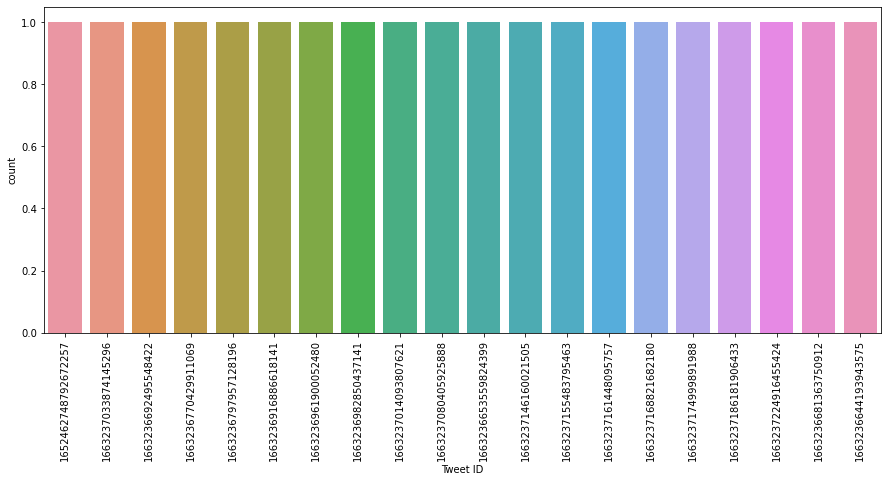

In [22]:
#I Tweet ID sono tutti uno
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Tweet ID', order=df["Tweet ID"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [23]:
df.head(3)

,Date Created,Tweet ID,Content,Username,Nr. Likes,Lang,Tweet Source,Replies,Mentions,outlinks
0,2023-04-29 23:59:55+00:00,1652462748792672257,Some of the best #AI writing assistants in 202...,farahsays01,1,en,NaN,1,"[User(username='OpenAI', id=4398626122, displa...",[]
1,2023-04-29 23:59:54+00:00,1652462745772597249,#RT @phocuswire: In an interview with PhocusWi...,CravenTravels,0,en,NaN,0,"[User(username='phocuswire', id=109269437, dis...",['https://bit.ly/3LtSQlB']
2,2023-04-29 23:59:48+00:00,1652462718920654883,"@skepoet and I discuss the internet, ChatGPT a...",ViewsParallax,4,en,NaN,0,"[User(username='skepoet', id=401715612, displa...",['https://www.patreon.com/posts/parallax-vlog-...


In [24]:
df['Replies'].unique()

array([   1,    0,    2,   23,    3,    6,    5,   10,    8,    4,   22,
         13,    7,   17,   94,    9, 3712,   14,   26,   18,  331, 1361,
        137,   42,   29,   15,  366,  119,   16,   53,  169,   27,   25,
         34,   46,   73,   11,   35,  222,   19,   37,  114,  104,  121,
         58,   20,   50, 1098,  781,   21,   41,   32, 1261,   12,  110,
        117,  138,   64,   24,   47,  312,  103,   44,  101,   72,  478,
        502,  198,  362,  176,  113,  135,  188, 3073,  116,  150,  223,
         86,   63,   66,  120,   52,  134,   74,   28,   54,   31,   43,
        224,   49,  927,  187,   67, 1284,   56])

In [25]:
len(df['Replies'].unique()) #numero di valori per il conteggio dei Reply

95

In [26]:
df['Replies'].value_counts()

0      12976
1       5063
2        970
3        329
4        153
       ...  
103        1
44         1
101        1
478        1
56         1
Name: Replies, Length: 95, dtype: int64

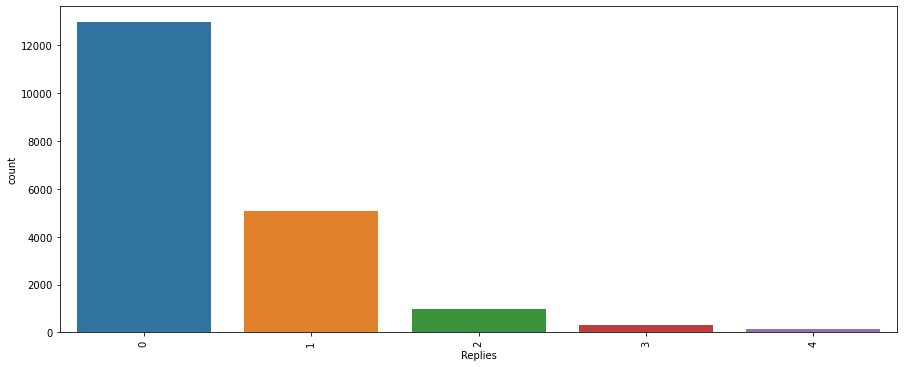

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Replies', order=df["Replies"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [28]:
df['Nr. Likes'].unique()

array([    1,     0,     4,     2,     5,     7,     6,     3,    17,
          15,    11,    57,    13,    40,    50,    29,     8,   198,
          28,    22,    54,    41,    21,     9,    64,   171,    71,
          10,    18,    14,    39,    19,    26,   101,   221,    12,
          37,    78,  2963,    23,    34,    35,    16,    25,    33,
          55,    24,   170,    59,    63,    20,    36,    58,  4128,
          96,   124,   194,    92,   247,    73,   169, 48534,    44,
         452,    32,  1666,   131,    83,   617,    76,    85,   264,
         315,    56,   840,    46,   858,    27,   166,   160,   406,
         104,  1976,    87,    38,   749,    93,   202,    81,  3289,
         163,    30,   102,   813,    60,    62,    86,    65,   514,
          49,   262,    91,   132,    51,  1569,  1876,    31,  1177,
       12950,   319,   125,   116,   239,   369,   232,    94, 32225,
         112,   115,   186,   152,    95,   229,   105,    72,   587,
          88,   750,

In [29]:
df['Nr. Likes'].value_counts()

0      9825
1      4301
2      1760
3       900
4       559
       ... 
151       1
391       1
666       1
328       1
354       1
Name: Nr. Likes, Length: 281, dtype: int64

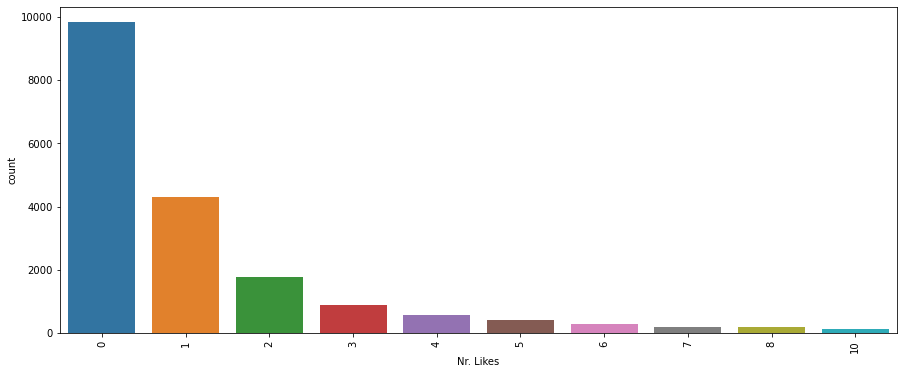

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Nr. Likes', order=df["Nr. Likes"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# Faccio esplorazione sui contenuti realtivi al numero maggiore e minore di Likes, Mentions, Replies

In [31]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Nr. Likes', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Nr. Likes']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,Content,Nr. Likes
1840,"Wow. I got my first #ChatGPT-written paper for an undergrad assignment on positionality. This line was the tell: “I do not have a personal history, identity, or culture in the traditional sense because I am an artificial intelligence language model.” Ooof!",48534
4620,If you’re not using ChatGPT for every aspect of your life you’re falling behind. \n\nI spent 20mins using ChatGPT to do something that would take 1min with Google—here’s how I did it and how you can too:,32225
3625,giraffe_legs.pdf by ChatGPT https://t.co/OKjxvTjwx2,12950
7665,Copy and paste these ChatGPT prompts to make your business more profitable:,5981
16518,It's easy to check if a text is generated by ChatGPT or not.\n\nBut it's possible to make your own ChatGPT text undetectable.\n\nHere's how to make detectors think your text was written by a human: https://t.co/tEVjXl5fa9,4845


In [32]:
#CERCO I TWEET CON IL MINOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Nr. Likes')

# Selezionare i primi 10 tweet con il numero di likes più alto
top_10_tweets = df_sorted.head(10)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_10_tweets = top_10_tweets[['Content', 'Nr. Likes']]

# Stampa del DataFrame con i primi 10 tweet e i relativi contenuti
top_10_tweets


,Content,Nr. Likes
10000,"I recently chill with ChatGPT most of my free time. It's like having a really wise teacher 24/7, even though it messes up from time to time, I've already learned a lot from it.",0
14674,Nvidia introduces AI supercomputer to create ChatGPT successors https://t.co/MOQhPNW6iZ via @cointelegraph,0
7376,"Access to ChatGPT has been restored in Italy. OpenAI, which is backed by Microsoft, said it had successfully ""addressed or clarified"" the issues raised. https://t.co/EWmUAk2wlW",0
7377,@gitfiddledude @_Jesus_Saves___ @BrandonJhappens @4Mischief It’s Chat GPT,0
14672,@unhingedpaki I guess she forgot to use chatgpt😂,0
7379,@MoSalihh Ente roomie project full from chat gpt aayirunnu,0
7380,#KiCurrency If you are still having issues withdrawing your coin or your platform is been frozen in any of this fake platform #kicurency\n#Robecoins #Drecur #fastbitra #exbiils SEND A MESSAGE\nNOW for help.#ชาล็อตออสติน #dollartreats #ChatGPT #Ukraine #cryptocurrencies #btc https://t.co/0izX1WwPcJ,0
14670,"Edward Snowden,at the Consensus Conference,gave his take on the state of AI. ChatGPT has been the rage as of now, but Snowden expressed his concerns that OpenAI is not really “open” and quite frankly, it’s not as smart as people think.\nhttps://t.co/sFONV8z0h8",0
7374,"I've been playing around with AI content on a couple of sites for about 18 months now. \nWay before Chat GPT existed. \nThe content wasn't good, certainly terrible compared to what Chat GPT could produce today, but things seemed to be working for a while. \nThen Google decided...",0
7383,@GlaciGlavo Uh-oh ChatGPT timed out responding to your prompt. Sorry 😓\n\nRef: 1652292594200608768,0


# Cerco di lavorare su colonna mentions, ma è strutturata come un array, non so come gestirla (comunque a regola non c'è in datset Giorgia)


In [33]:
df['Mentions'].unique()

array(["[User(username='OpenAI', id=4398626122, displayname='OpenAI', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='bing', id=14874480, displayname='Bing', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]",
       "[User(username='phocuswire', id=109269437, displayname='PhocusWire', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favou

In [34]:
df['Mentions'].value_counts()

[User(username='hasantoxr', id=1506055005992026115, displayname='Hasan Toor ✪', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]                                                                                                                                                                                                                                                                                                                                                                                                    333
[User(username='elonmusk', id=44196397, displayname='Elon Musk', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesC

Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.


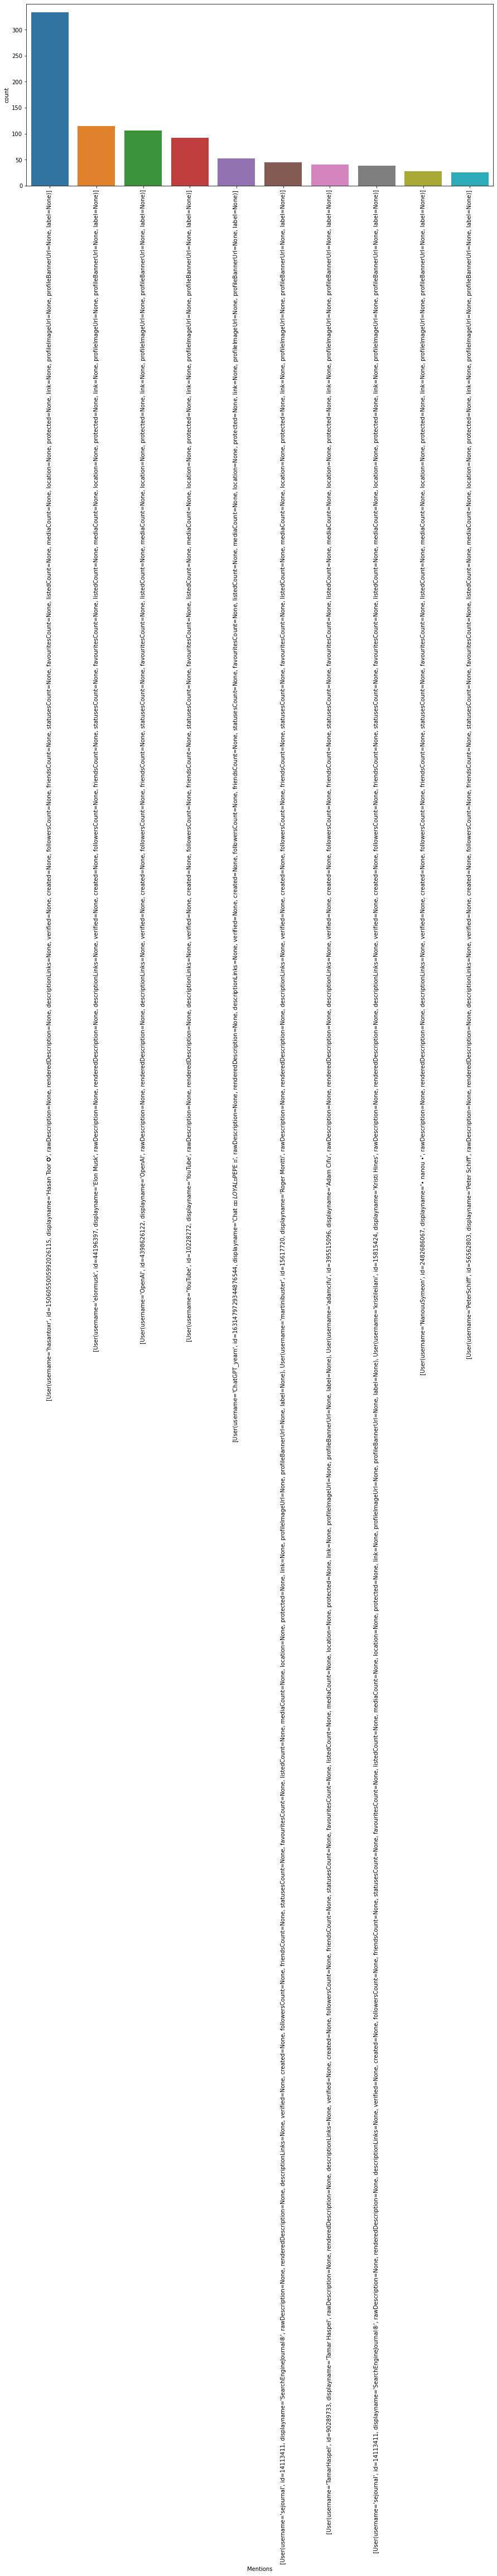

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Mentions', order=df["Mentions"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f47d' [U+1f47d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f52b' [U+1f52b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001fa99' [U+1fa99], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\U0001f438' [U+1f438], substituting with a dummy symbol.


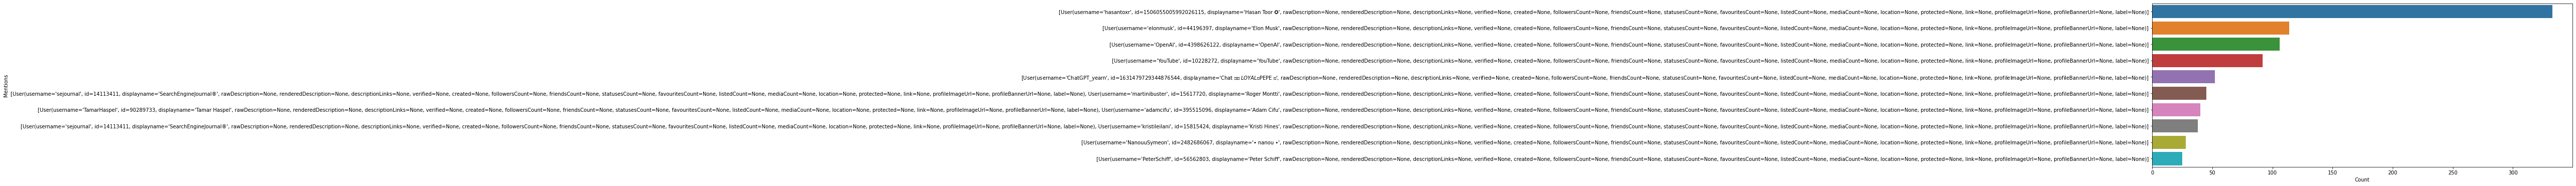

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, y='Mentions', order=df["Mentions"].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Mentions')
plt.show()


In [37]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI MENTIONS 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Mentions', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Mentions']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,Content,Mentions
1256,One reason we’re excited about the “age of AI?” It’s going to make programming and technical education a lot more accessible. 😌\n\nHere’s a sneak peek at how Codecademy is embracing the AI moment from our Co-Founder @ZSims!\n\nLearn #ChatGPT here: https://t.co/IuZASwylEd https://t.co/NvpoYDURO8,"[User(username='zsims', id=785691, displayname='zach sims', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
7826,"@zortea_tiago I asked chatGPT, here’s what it said:\n\nClinical psychology and psychopathology are two closely related but distinct fields of study within psychology. Here are some key differences between the two:","[User(username='zortea_tiago', id=1028890790, displayname='Tiago C. Zortea', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
18715,@znsuzara ChatGPT. 😅,"[User(username='znsuzara', id=785290818982555648, displayname='Budget Babe', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
17095,@zinnia630 Uh-oh ChatGPT timed out responding to your prompt. Sorry 😓\n\nRef: 1663046244787437570,"[User(username='zinnia630', id=771460743107489794, displayname='Louise', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
17112,@zhou8527 Uh-oh ChatGPT timed out responding to your prompt. Sorry 😓\n\nRef: 1663060417252569088,"[User(username='zhou8527', id=1660201108042833925, displayname='Zhou', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"


In [38]:
#CERCO I TWEET CON IL MINOR NUMERO DI MENTIONS ---> mi viene 1 è un po' strano

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Mentions')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Mentions']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,Content,Mentions
7687,@00026_eth \n\nChatGPT is a computer program that is very smart. It can understand what people say and answer questions. It is like having a very smart friend who can help you with your questions.,"[User(username='00026_eth', id=1490059459938471937, displayname='1️⃣9️⃣7️⃣9️⃣.eth', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
15572,@050214__ ykw fuck it idc anymore chatgpt will just write the rest of this shit 4 me,"[User(username='050214__', id=1188279863783768064, displayname='alex 🐹 SEVENTEEN DAY', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
9106,@0shailja How do I improve my communication skills?\n\nHow do I reset my password?\n\nHow do I get to the nearest gas station?\n\nHow do I bake a cake from scratch?\n\nHow do I deal with stress and anxiety?\n\nHow do I learn a new language?\n\nHow do I build a successful career?\n\nBy ChatGPT!,"[User(username='0shailja', id=1312992460902076416, displayname='shailja', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
2599,@0x66726564 @DCbuild3r Stop using chatGPT Fred!,"[User(username='0x66726564', id=1059142196732051457, displayname='fred', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='DCbuild3r', id=848628608738488321, displayname='dcbuilder.eth 🕯4844🕯.oO', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
6845,@0x8i11i0n Chat GPT smack his ass https://t.co/oMxa9oDRay,"[User(username='0x8i11i0n', id=1618182177828794369, displayname='Tsubasa', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"


In [39]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Replies', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,Content,Replies
1497,"ChatGPT is heaven for no coders.\n \nSo I built 300 prompts + a list of the 50 best no code tools.\n\nNormally $47\n\nBut for the next 24 hrs I've made it available, FREE of charge!\n\nLike &amp; Reply below with a ""🔥"" and I'll send you the bundle. https://t.co/YTSO87IvL0",3712
12037,#Bitindi #AI is named #Casper \n\n#cryptocurrency #blockchain #Crypto #Ethereum #trading #CryptocurrencyMarket #Airdrop #coin #newcryptocurrency #Bitcoin #BinanceUS #ICO #BTC #Dogecoin #altcoins #altcoin #Cardano #100x #1000x #NFTs #nftart #ArtificialIntelligence #ChatGPT #GPT4 #GPT #AI #bitindi #bitindichain #Elonmusk #CJ #Vitalik,3073
2138,"99% of people don't use ChatGPT to its full potential\n\nI just crafted the best ChatGPT guide to help you get +8,000 leads in a week\n\nThis guide could make you $10,000+ a month in 2023\n\nAnd for 24 hours, it's FREE\n\nLike + Comment ""GPT"" & I'll DM you the details\n\nMust be following",1361
18908,"ChatGPT can make you $5,000/month\n\nBut almost everyone's stuck in beginner mode\n\nSo I built ""Master ChatGPT"" ebook.\n\n• Zero to hero full guide\n• Make money using ChatGPT \n• FREE Prompts &amp; Resources\n\nTo get it, just:\n1. Like \n2. Reply 'GPT '\n3. Follow me (so that I can DM you) https://t.co/So3USsV5Z3",1284
6862,Giveaway Time🔥\n\nI will giveaway:\n\n1. 3x Udemy &amp; ChatGPT Courses\n2. 5x JavaScript &amp; React Courses\n3. 3x Full Stack Courses\n4. 5x Self Help Books ( Your Choice )\n\nTo Participate:\n\nJust:\n• Follow\n• Like and comment what thing you want.\n\nThank you for always supporting me.,1261


In [40]:
#CERCO I TWEET CON IL MINOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('Replies')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['Content', 'Replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,Content,Replies
10000,"I recently chill with ChatGPT most of my free time. It's like having a really wise teacher 24/7, even though it messes up from time to time, I've already learned a lot from it.",0
9269,https://t.co/95lrTHHlhk via @Thedailytipste2 \nMachine learning and AI horse racing\nAre you tech-savvy and would like to use the API for your own development of a racing system and maybe include ChatGPT or some form of AI/Machine learning for a side hustle you can profit from?,0
9270,Most INSANE things ever done on ChatGPT (GPT-4)\nhttps://t.co/oO8aghDHxh Recipes \n2.Virtual Volunteer (Be My Eyes)\n3.Hand drawn sketch to a working website\nhttps://t.co/UMhEWIOwzP advice\n5.Coding an entire game\n#chatgpt4 \nhttps://t.co/tagkG0kEx1\nhttps://t.co/7RdXqMmXcS https://t.co/deI0t6VMzd,0
9271,Italy lifts ban on ChatGPT after data privacy improvements https://t.co/58Nv2kjx6Y \n10,0
16746,"Artificial intelligence (ai) and cryptocurrency are two rapidly evolving technological fields that have grown exponentially with the emergence of chatgpt. Ai crypto refers to combining these two technologies, where ai systems are used to im",0


In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:

from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer


In [43]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

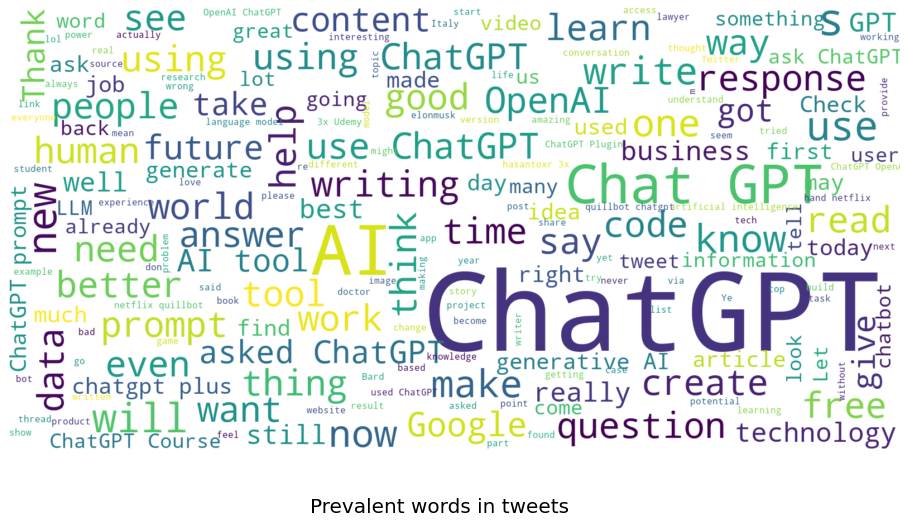

In [44]:
show_wordcloud(df['Content'], title = 'Prevalent words in tweets')

# Eseguo la sentiment anlaysis per fare altre ricerche 

In [46]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [47]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()



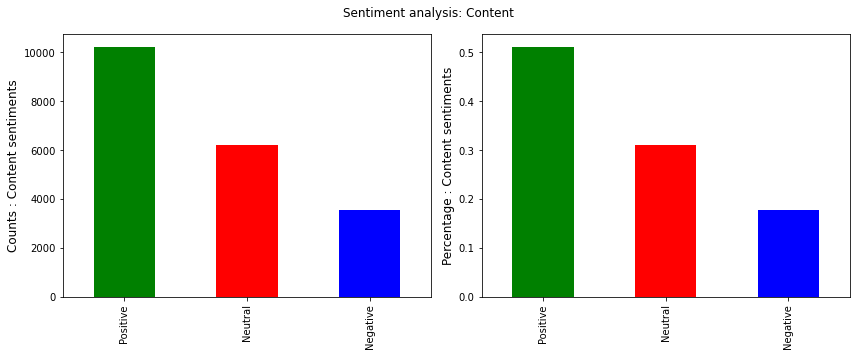

In [48]:
df['text_sentiment'] = df['Content'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Content')

In [49]:
tweets_agg_df = df.groupby(["Nr. Likes", "text_sentiment"])["Content"].count().reset_index()
tweets_agg_df.columns = ["Nr. Likes", "text_sentiment", "count"]
tweets_agg_df

,Nr. Likes,text_sentiment,count
0,0,Negative,1727
1,0,Neutral,3294
2,0,Positive,4804
3,1,Negative,732
4,1,Neutral,1343
...,...,...,...
426,4845,Positive,1
427,5981,Positive,1
428,12950,Neutral,1
429,32225,Negative,1


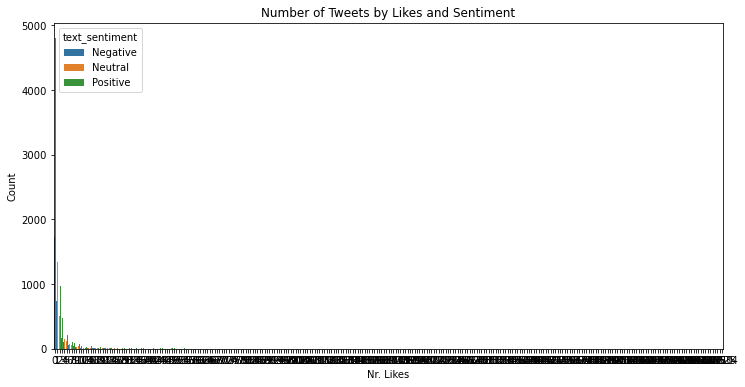

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="Nr. Likes", y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()

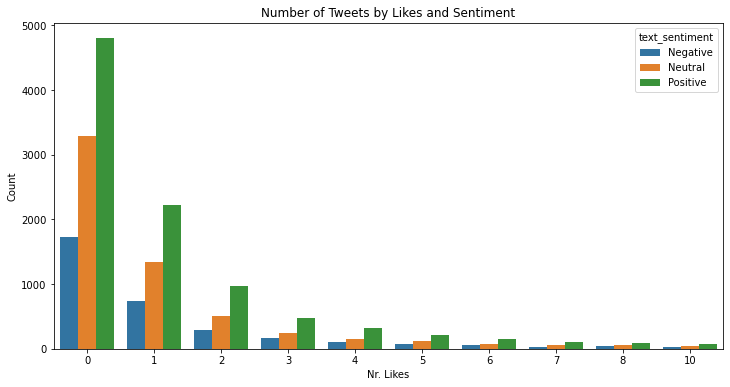

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="Nr. Likes",order=df["Nr. Likes"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()


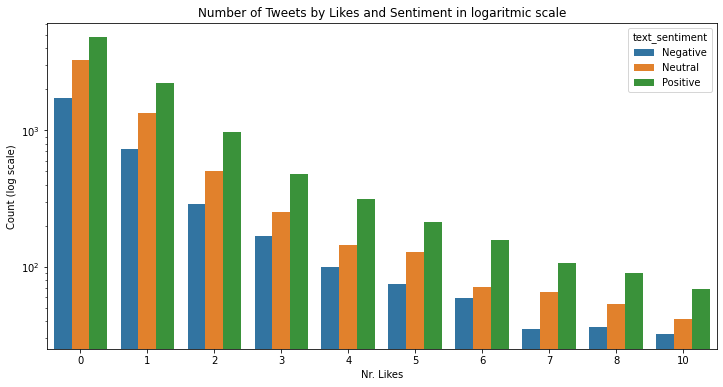

In [67]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="Nr. Likes", order=df["Nr. Likes"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Likes")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Likes and Sentiment in logaritmic scale")
plt.show()


In [68]:
#Eseguo stessa operazione per Replies
tweets_agg_df = df.groupby(["Replies", "text_sentiment"])["Content"].count().reset_index()
tweets_agg_df.columns = ["Replies", "text_sentiment", "count"]
tweets_agg_df

,Replies,text_sentiment,count
0,0,Negative,2197
1,0,Neutral,4393
2,0,Positive,6386
3,1,Negative,917
4,1,Neutral,1355
...,...,...,...
153,1261,Positive,1
154,1284,Positive,1
155,1361,Positive,1
156,3073,Neutral,1


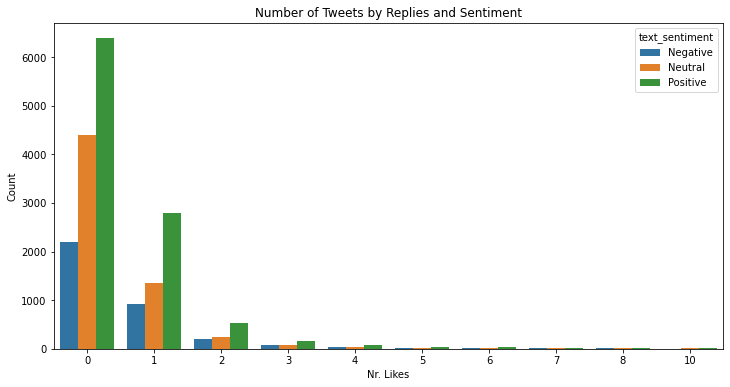

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="Replies",order=df["Replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Replies and Sentiment")
plt.show()


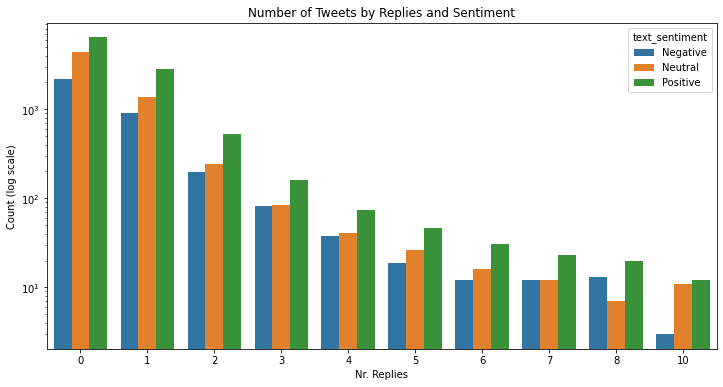

In [70]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="Replies", order=df["Replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Replies")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Replies and Sentiment")
plt.show()


# Dai grafici sembra che in generale le persone retwittano e mettono più like ai post classificati come "positivi" (in linea col sentimento)

# Provo a creare wordcloud con le parole dei tweet che hanno più like --> positivi e negativi

In [52]:
stopwords = set(STOPWORDS)

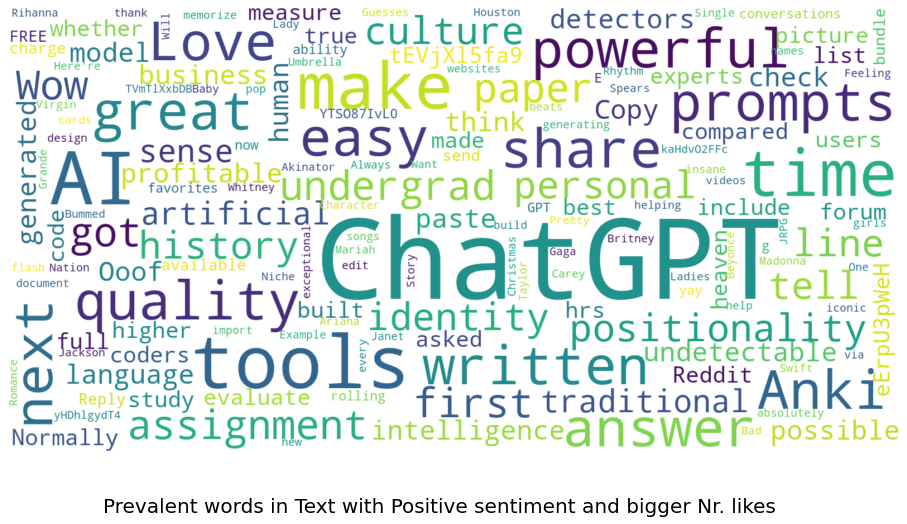

In [71]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'Nr. Likes')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['Content']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Positive sentiment and bigger Nr. likes')


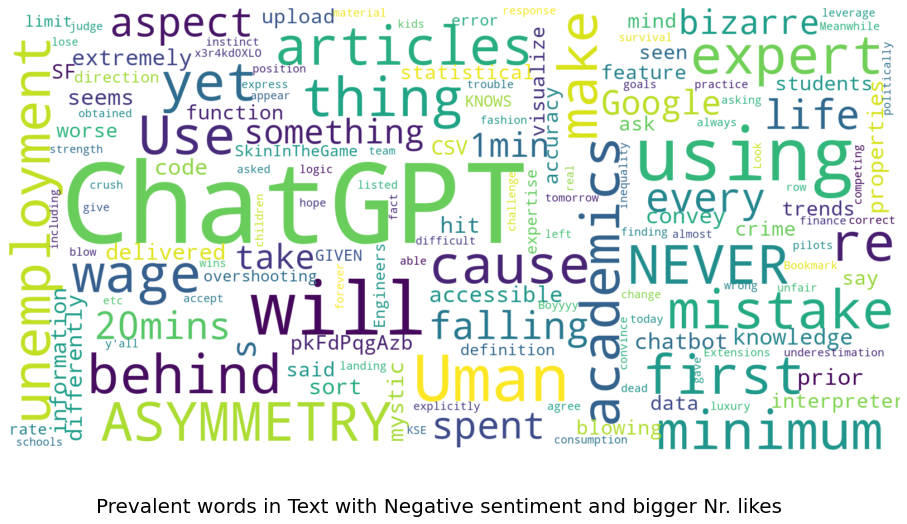

In [73]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'Nr. Likes')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['Content']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Negative sentiment and bigger Nr. likes')


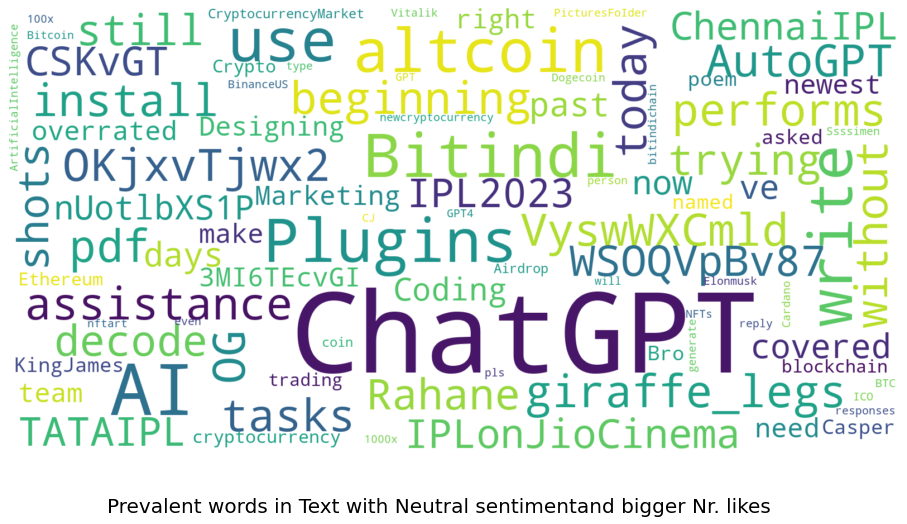

In [74]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'Nr. Likes')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['Content']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Neutral sentimentand bigger Nr. likes')
